**PRACTICA 1**

*Veronica Marisela Frias Peralta*
*veronica.frias6148@alumnos.udg.mx*


#MODULES

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go

from scipy.stats import wrapcauchy


#CLASSES

In [32]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)


##Ejemplo Brownian Motion 1D

In [33]:
# Init parameters
s_pos = 10
n_steps = 1000
n_trajectories = 100

# Warning about the small number of steps
if n_steps < 30:
    print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

# Init Brownian Walk vector
bws = list()
for i in range(n_trajectories):
  bws.append(np.ones(n_steps)*s_pos)

# Generate trajectory
for j in range(n_trajectories):
  bw = bws[j]
  for k in range(1, n_steps):
      # Sampling from a uniform distribution
      di = np.random.choice([1,-1])
      # Wiener process
      bw[k] = bw[k-1]+(di/np.sqrt(n_steps))

In [34]:
# Generate trajectory
for i in range(10, n_steps):
  # Sampling from an uniform distribution
  # di = np.random.choice([1, -1], p=[0.5, 0.5])
  di = np.random.choice([1, -1])
  # Wiener process
  bw[i] = bw[i-1]+(di/np.sqrt(n_steps))

# bw

## Actividad 1: Brownian Motion 1D - N Trayectorias (3 pts)

* Implementacion con variable de control que permita generar y graficar cualquier numero de trayectorias
* Visualizar con *matplotlib*

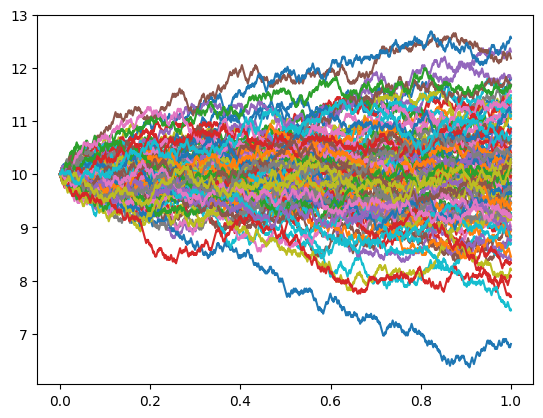

In [35]:
# Times aux
times = np.linspace(0, 1, n_steps)

# Graficar con matplotlib
for l in range(n_trajectories):
  plt.plot(times, bws[l])
plt.show()


## Actividad 2: Brownian Motion 2D - 1 Trayectoria (5 pts)

* **No** utilizar la clase Vec2d
* Movimientos: Norte, Sur, Este, Oeste (arriba, abajo, izquierda, derecha)
* Visualizar con **matplotlib** - Proyeccion en 2D
* Visualizar con **matplotlib** - Proyeccion en 3D

In [50]:
#Init variables
n_steps = 1000
s_pos = 0
speed = 8
times = np.linspace(0,1, n_steps)

# Init velocity vector
velocity = 2

# Matriz para Brownian Walker
BM_2d = np.ones(shape = (n_steps, 2))*s_pos

for i in range(1, n_steps):
  indice = np.random.choice([0,1,2,3])
  coordenadas = [[0,velocity], [velocity,0], [0,-velocity], [-velocity,0]]
  xy = coordenadas[indice]

  BM_2d[i, 0] = BM_2d[i-1, 0]+xy[0]
  BM_2d[i, 1] = BM_2d[i-1, 1]+xy[1]


<function matplotlib.pyplot.show(close=None, block=None)>

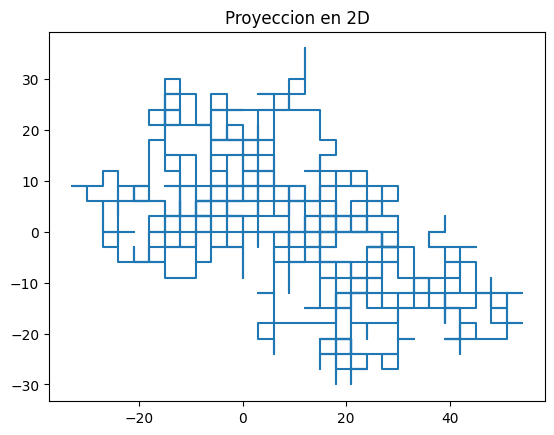

In [46]:
# PLot Brownian con matplotlib - Proyeccion en 2D
plt.figure("Proyeccion en 2D")
plt.title("Proyeccion en 2D")
plt.plot(BM_2d[:,0], BM_2d[:,1])
plt.show

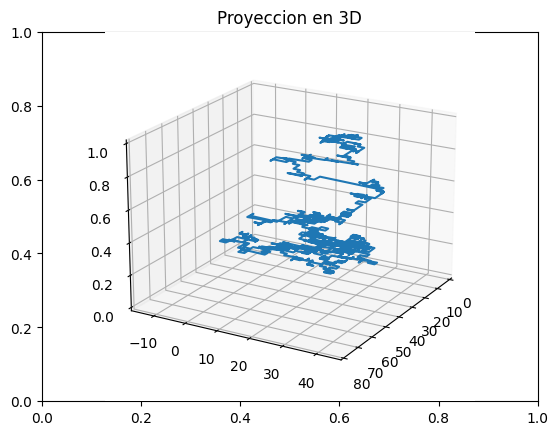

In [51]:
# PLot Brownian con matplotlib - Proyeccion en 3D
fig = plt.figure("Proyeccion en 3D")
plt.title("Proyeccion en 3D")
ax = fig.add_subplot(111, projection='3d')

#Trazar la proyeccion 3D
ax.plot(BM_2d[:,0], BM_2d[:,1], times)

#Ajustar los lìmites directamente en el objeto Axes3D
ax.set_xlim([min(BM_2d[:, 0]), max(BM_2d[:, 0])])
ax.set_ylim([min(BM_2d[:, 1]), max(BM_2d[:, 1])])

# Ajustar el límite del eje z
ax.set_zlim([min(times), max(times)])

# Configurar la vista en 3D
ax.view_init(elev=20, azim=30)

#Mostrar la figura
plt.show()

## Actividad 3: Correlated Random Walk - 1 Trayectoria (7 pts)

* Utilizar la clase Vec2d
* Seleccionar los giros del vector de velocidad de una distribucion de Cauchy
* **Tip:** Revisar documentacion de scipy.stats.wrapcauchy
* Visualizar con **plotly** - Proyeccion en 2D
* Visualizar con **plotly** - Proyeccion en 3D

In [39]:
# Init variables
QRW_exponent = 0.7
n_steps = 1000
s_pos = 0
speet = 6

# Generate vector of random values
aux_domain = np.linspace(0, 2*np.pi, n_steps)
wrapcauchy_rvs = wrapcauchy.rvs(QRW_exponent, size = n_steps)

# Init velocity vector
velocity = Vec2d(speed, 0)

# Matriz Brownian Walker
BM_2d = np.ones(shape = (n_steps, 2))*s_pos

for i in range(1, n_steps):
  velocity = velocity.rotated(wrapcauchy_rvs[i])

  BM_2d[i, 0] = BM_2d[i-1, 0]+velocity.x
  BM_2d[i, 1] = BM_2d[i-1, 1]+velocity.y

In [13]:
from numpy.matrixlib.defmatrix import concatenate
# Init figure
fig_wrapcauchy_rvs = go.Figure()

aux_plot = np.linspace(-np.pi,np.pi, n_steps)

plot_wrapcauchy_rvs = concatenate((wrapcauchy_rvs[int(n_steps/2):n_steps],wrapcauchy_rvs[0:int(n_steps/2)]), axis = 0)

fig_wrapcauchy_rvs.add_trace(go.Scatter(x = aux_domain,
                                        y = plot_wrapcauchy_rvs,
                                        marker = dict(size=2),
                                        line = dict(width=2),
                                        mode = 'lines',
                                        name = 'cauchy_0.7',
                                        showlegend = True
                                        ))

fig_wrapcauchy_rvs.show()

In [14]:
# Init figure
fig_BM_2d = go.Figure()

# plot trajectory
fig_BM_2d.add_trace(go.Scatter(x = BM_2d[:,0],
                               y= BM_2d[:,1],
                               marker = dict(size=2),
                               line = dict(width=2),
                               mode = 'lines',
                               name = 'cauchy_0.7',
                               showlegend = True
                               ))

In [19]:
# time aux vector
times = np.linspace(0,1, n_steps)

# init figure
fig_BM_3d = go.Figure()

# Plot
fig_BM_3d.add_trace(go.Scatter3d(x = BM_2d[:,0],
                                 y = BM_2d[:,1],
                                 z = times,
                                 marker = dict(size=2),
                                 line = dict(width=2),
                                 mode = 'lines',
                                 name = 'cauchy_0.7',
                                 showlegend = True
                                 ))

print(BM_2d[:,0])
# Figure parameters -- update layoud
fig_BM_3d.layout.update(title_text = 'BM trajectory in 2D',
                        autosize = False,
                        width = 500,
                        height = 500,
                        scene_camera=dict(
                            up=dict(x=0, y=1, z=0),
                            center=dict(x=0, y=0, z=0),
                            eye=dict(x=0, y=0, z=1),
                        ),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='z_pos (mm)')
                        ))

fig_BM_3d.show()

[ 0.00000000e+00  5.86722700e+01  1.06333883e+02  1.95814249e+02
  2.40687877e+02  2.60870409e+02  2.52789035e+02  2.60646268e+02
  2.17922500e+02  1.57798026e+02  7.10801858e+01 -1.45575765e+01
 -9.28618770e+01 -1.78011953e+02 -1.16711472e+02 -4.11269031e+01
  2.43620598e+01  8.98730117e+01  1.22968053e+02  1.90430752e+02
  2.42485213e+02  2.24521709e+02  1.99633160e+02  1.90566486e+02
  2.18354945e+02  1.67252203e+02  8.67751349e+01  2.26304811e+01
 -4.68893748e+01  3.02767147e+01  8.92742128e+01  1.61644518e+02
  2.36607965e+02  1.86496740e+02  1.68835235e+02  1.70255271e+02
  1.52524918e+02  1.31203132e+02  1.04968619e+02  1.74265903e+02
  2.50009104e+02  3.36184411e+02  3.03550412e+02  2.61574823e+02
  2.72893620e+02  2.30741962e+02  3.02679699e+02  3.68173064e+02
  4.34629849e+02  5.22937868e+02  6.12914416e+02  5.39083534e+02
  4.52080840e+02  3.63712069e+02  2.74768969e+02  3.22918707e+02
  3.85182310e+02  4.42248532e+02  4.81418859e+02  5.27365340e+02
  5.67762677e+02  6.48582